# Assignment : GDP Analysis of the Indian States

Part I-A:

For the analysis below, use the Data I-A.

Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states. Make appropriate transformations, if necessary, to plot the data. Report the average growth rates of the various states:

Which states have been growing consistently fast, and which ones have been struggling?

Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

Plot the total GDP of the states for the year 2015-16:

Identify the top 5 and the bottom 5 states based on total GDP.


In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Data of Data I-A: This dataset consists of the GSDP (Gross State Domestic Product) data for the states and union territories.

df = pd.read_csv("Downloads/ab40c054-5031-4376-b52e-9813e776f65e.csv")
df.head(10) # Read the first 10 rows across the data set to view the data 

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


## Inspecting the data

In [3]:
# Let us look for the dimenstion of the datasets : 11 rows and 36 coloumns
df.shape

(11, 36)

In [4]:
# Let us check the coloumn wise information with each data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

In [5]:
# Get the summary of the dataframe
df.describe()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
count,11.000000,9.000000,9.000000,9.000000,11.000000,9.000000,9.000000,11.000000,7.000000,9.000000,...,11.000000,7.000000,9.000000e+00,9.000000,0.0,7.000000,9.000000,11.000000,11.000000,1.100000e+01
mean,280986.561818,8201.516667,100018.167778,181565.673333,120748.879091,22450.120000,448568.674444,228667.271818,50673.064286,53343.001111,...,268570.787273,13739.691429,5.209237e+05,82588.947778,NaN,2759.814286,13707.002222,258693.004545,12527.435455,6.479952e+06
std,282573.532407,8073.276061,97589.497456,178700.497677,120928.480448,21443.429799,438025.627165,228195.895576,48384.121107,51712.668467,...,268734.549079,13240.797263,5.087288e+05,80553.858327,NaN,2627.016700,13399.003286,258176.516280,12445.889343,6.433000e+06
min,8.430000,12.070000,9.560000,10.590000,10.980000,-10.020000,10.820000,9.180000,10.140000,4.700000,...,11.700000,12.780000,1.051000e+01,8.120000,NaN,10.890000,8.840000,10.960000,10.140000,9.990000e+00
25%,14.025000,14.790000,13.190000,14.250000,12.995000,10.750000,11.470000,14.135000,14.155000,11.310000,...,12.840000,17.030000,1.365000e+01,13.650000,NaN,13.905000,14.710000,13.095000,11.815000,1.224500e+01
50%,379402.000000,11063.000000,143175.000000,247144.000000,158074.000000,35921.000000,615606.000000,297539.000000,72720.000000,78254.000000,...,359433.000000,19208.000000,7.240490e+05,115523.000000,NaN,3979.000000,18768.000000,343767.000000,16818.000000,8.736039e+06
75%,495370.000000,14602.000000,177745.000000,317101.000000,220836.000000,40633.000000,807623.000000,419062.000000,88792.000000,95893.000000,...,481682.000000,23628.000000,9.441460e+05,149817.000000,NaN,4790.000000,24787.000000,468103.500000,22979.500000,1.183519e+07
max,699307.000000,18784.000000,224234.000000,413503.000000,290140.000000,45002.000000,994316.000000,547396.000000,104369.000000,118387.000000,...,654294.000000,29667.000000,1.153795e+06,184091.000000,NaN,5721.000000,30304.000000,622385.000000,29557.000000,1.525103e+07


## Cleaning the data

In [6]:
# Inspect for NAN values in the given dataframe using isnull() and sum() in the coloumn
df.isnull().sum()

Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal1                 11
Andaman 

In [7]:
# Inspect for NAN values in the given dataframe using isnull() and sum() in the row wise
df.isnull().sum(axis=1) 

0      1
1      1
2      1
3      1
4     10
5     23
6      1
7      1
8      1
9     10
10    23
dtype: int64

In [8]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places
round(100*(df.isnull().sum()/len(df.index)), 2)

Items  Description             0.00
Duration                       0.00
Andhra Pradesh                 0.00
Arunachal Pradesh             18.18
Assam                         18.18
Bihar                         18.18
Chhattisgarh                   0.00
Goa                           18.18
Gujarat                       18.18
Haryana                        0.00
Himachal Pradesh              36.36
Jammu & Kashmir               18.18
Jharkhand                     18.18
Karnataka                     18.18
Kerala                        18.18
Madhya Pradesh                 0.00
Maharashtra                   36.36
Manipur                       36.36
Meghalaya                      0.00
Mizoram                       36.36
Nagaland                      36.36
Odisha                         0.00
Punjab                        36.36
Rajasthan                     36.36
Sikkim                        18.18
Tamil Nadu                     0.00
Telangana                      0.00
Tripura                     

In [9]:
print (df.isnull().values.any()) # there are 73 NA Values across the data frame.
print (df.isnull().values.sum())

True
73


### We can see that the West bengal1 is having all NA values as the highest. We can delete the coloumn as it doesnt have any data contained in it. 


In [10]:
# Use the 'drop()' function to drop the coloumn of West bengal as well as the Only states needed not Union Teritories

df=df.drop(['West Bengal1'],axis=1)
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,1338766.00,654294.00,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [11]:
df.shape # Note that the one coloumn is dropped (11,36) become (11,35)---- one coloumn is dropped due to non availability of NA

(11, 35)

In [12]:
# drop NA values in the rows 
#GSDP - CURRENT PRICES (` in Crore)	2016-17
#(% Growth over previous year)	2016-17
#Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

df= df[df.Duration != '2016-17'] # Entire row of 2016-17 is dropped due to NA values and no need it
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [13]:
df.tail(10)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [14]:
# Inspecting again the data frame and see where still NA values present. 

round(100*(df.isnull().sum()/len(df.index)), 2)

Items  Description            0.00
Duration                      0.00
Andhra Pradesh                0.00
Arunachal Pradesh             0.00
Assam                         0.00
Bihar                         0.00
Chhattisgarh                  0.00
Goa                           0.00
Gujarat                       0.00
Haryana                       0.00
Himachal Pradesh             22.22
Jammu & Kashmir               0.00
Jharkhand                     0.00
Karnataka                     0.00
Kerala                        0.00
Madhya Pradesh                0.00
Maharashtra                  22.22
Manipur                      22.22
Meghalaya                     0.00
Mizoram                      22.22
Nagaland                     22.22
Odisha                        0.00
Punjab                       22.22
Rajasthan                    22.22
Sikkim                        0.00
Tamil Nadu                    0.00
Telangana                     0.00
Tripura                      22.22
Uttar Pradesh       

In [15]:
# Get the number of retained rows using 'len()'
# Get the percentage of retained rows by dividing the current number of rows with initial number of rows

print(len(df.index))
print(len(df.index)/11)

9
0.8181818181818182


In [16]:
## still we can see that around 22.22 % of data contains NAN values.
# The rows for which the sum of Null is less than five are retained
df['Himachal Pradesh'].describe()


count         7.000000
mean      50673.064286
std       48384.121107
min          10.140000
25%          14.155000
50%       72720.000000
75%       88792.000000
max      104369.000000
Name: Himachal Pradesh, dtype: float64

In [17]:
df['Andaman & Nicobar Islands'].describe()

count       7.000000
mean     2759.814286
std      2627.016700
min        10.890000
25%        13.905000
50%      3979.000000
75%      4790.000000
max      5721.000000
Name: Andaman & Nicobar Islands, dtype: float64

In [18]:
df['Manipur'].describe()

count        7.000000
mean      8705.667143
std       8298.692552
min          6.450000
25%         14.610000
50%      12915.000000
75%      14973.000000
max      18043.000000
Name: Manipur, dtype: float64

In [19]:
df['Mizoram'].describe()

count        7.000000
mean      5360.514286
std       5180.533709
min         12.300000
25%         19.150000
50%       7259.000000
75%       9327.500000
max      11559.000000
Name: Mizoram, dtype: float64

In [20]:
df['Nagaland'].describe()

count        7.000000
mean      8647.408571
std       8338.966000
min         10.850000
25%         18.505000
50%      11839.000000
75%      15115.500000
max      18414.000000
Name: Nagaland, dtype: float64

In [21]:
df['Punjab'].describe()

count         7.000000
mean     181017.291429
std      172158.243521
min           9.950000
25%          12.045000
50%      266628.000000
75%      316224.000000
max      368011.000000
Name: Punjab, dtype: float64

In [22]:
df['Rajasthan'].describe()

count         7.000000
mean     298914.260000
std      284618.513069
min          11.270000
25%          12.275000
50%      436465.000000
75%      521852.500000
max      612194.000000
Name: Rajasthan, dtype: float64

In [23]:
df['Tripura'].describe()

count        7.000000
mean     13739.691429
std      13240.797263
min         12.780000
25%         17.030000
50%      19208.000000
75%      23628.000000
max      29667.000000
Name: Tripura, dtype: float64

In [24]:
# We can see the minimum is only 10 and max is 104369. 25% - 14.15. Better to remove the coloum than impute it. lot of bias is there.
# Use the 'drop()' function to drop the coloumn having 22%

df=df.drop(['Himachal Pradesh','Maharashtra','Manipur','Mizoram','Nagaland','Punjab','Rajasthan','Tripura','Andaman & Nicobar Islands'],axis=1)
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,227872.00,11165.00,751485.00,359433.00,724049.00,115523.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,258275.00,12338.00,855481.00,401493.00,822903.00,131835.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,291709.00,13862.00,971090.00,452186.00,944146.00,149817.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,321971.00,15209.00,1092564.00,511178.00,1043371.00,161985.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,341887.00,16637.00,1212668.00,575631.00,1153795.00,184091.00,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.34,10.51,13.84,11.70,13.65,14.12,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.35,13.51,12.63,14.73,13.64,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.72,12.51,13.05,10.51,8.12,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,9.39,10.99,12.61,10.58,13.65,8.84,12.09,10.15,9.99


In [25]:
# Inspecting again the data frame and see where still NA values present. 

round(100*(df.isnull().sum()/len(df.index)), 2)

Items  Description    0.0
Duration              0.0
Andhra Pradesh        0.0
Arunachal Pradesh     0.0
Assam                 0.0
Bihar                 0.0
Chhattisgarh          0.0
Goa                   0.0
Gujarat               0.0
Haryana               0.0
Jammu & Kashmir       0.0
Jharkhand             0.0
Karnataka             0.0
Kerala                0.0
Madhya Pradesh        0.0
Meghalaya             0.0
Odisha                0.0
Sikkim                0.0
Tamil Nadu            0.0
Telangana             0.0
Uttar Pradesh         0.0
Uttarakhand           0.0
Chandigarh            0.0
Delhi                 0.0
Puducherry            0.0
All_India GDP         0.0
dtype: float64

## Data is completely cleaned now.
## Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states. Make appropriate transformations, if necessary, to plot the data. Report the average growth rates of the various states:

Which states have been growing consistently fast, and which ones have been struggling?

Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

In [26]:
df=df.tail(3) # taken the last five rows and stored in dataframe 
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand,Chandigarh,Delhi,Puducherry,All_India GDP
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.35,13.51,12.63,14.73,13.64,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.72,12.51,13.05,10.51,8.12,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,9.39,10.99,12.61,10.58,13.65,8.84,12.09,10.15,9.99


In [27]:
df=df.pivot_table(index = 'Duration', aggfunc = 'mean') # using Pivot table agg. the mean and plot the graph. 
df

,All_India GDP,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,...,Kerala,Madhya Pradesh,Meghalaya,Odisha,Puducherry,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand
Duration,,,,,,,,,,,,,,,,,,,,,
2013-14,12.97,12.85,16.38,13.31,12.30,14.71,16.44,13.43,-5.77,11.47,...,12.79,14.91,4.87,12.95,15.87,12.35,13.51,12.63,14.73,13.64
2014-15,10.65,13.40,14.79,11.45,17.92,12.33,13.69,10.96,13.12,10.82,...,13.11,10.11,6.41,10.37,10.14,9.72,12.51,13.05,10.51,8.12
2015-16,9.99,15.85,12.07,13.19,10.59,8.84,10.98,12.09,10.75,11.09,...,11.85,12.86,9.58,6.19,10.15,9.39,10.99,12.61,10.58,13.65


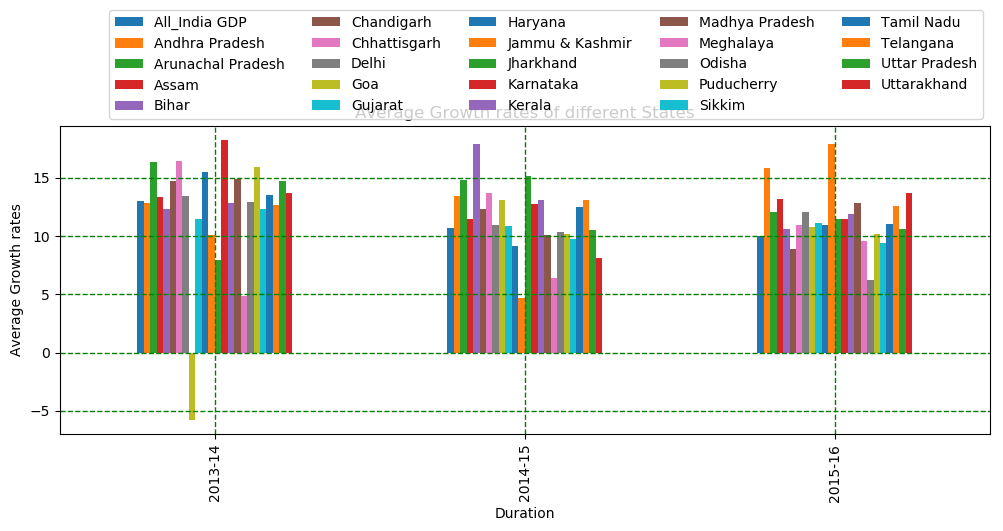

In [41]:
# Plot the graph and size the graph and legend outside the graph

import matplotlib.pyplot as plt  
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
df.plot.bar(figsize=(12,4))
plt.title("Average Growth rates of different States")
plt.xlabel('Duration')
plt.ylabel('Average Growth rates')
plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1, 1), loc='lower right', ncol=5)
plt.grid(True, linewidth= 1, linestyle="--",color="g")
plt.show()





## For Each Year, the growth rate of the states over the years is given above.

## <font color = green> Highest Year wise states growth rate </font> 

### 2013-14 - Karnataka 
### 2014-15 - Bihar
### 2015-16 - Jammu & Kashmir

In [29]:
df1=df.pivot_table(index = 'Duration', aggfunc = 'mean').mean().sort_values()# Use the pivot table and did the mean calculation across the states
df1

Goa                   6.033333
Meghalaya             6.953333
Odisha                9.836667
Sikkim               10.486667
Jammu & Kashmir      10.900000
Gujarat              11.126667
All_India GDP        11.203333
Jharkhand            11.500000
Uttarakhand          11.803333
Haryana              11.846667
Uttar Pradesh        11.940000
Chandigarh           11.960000
Puducherry           12.053333
Delhi                12.160000
Tamil Nadu           12.336667
Kerala               12.583333
Madhya Pradesh       12.626667
Assam                12.650000
Telangana            12.763333
Bihar                13.603333
Chhattisgarh         13.703333
Andhra Pradesh       14.033333
Karnataka            14.120000
Arunachal Pradesh    14.413333
dtype: float64

In [30]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns

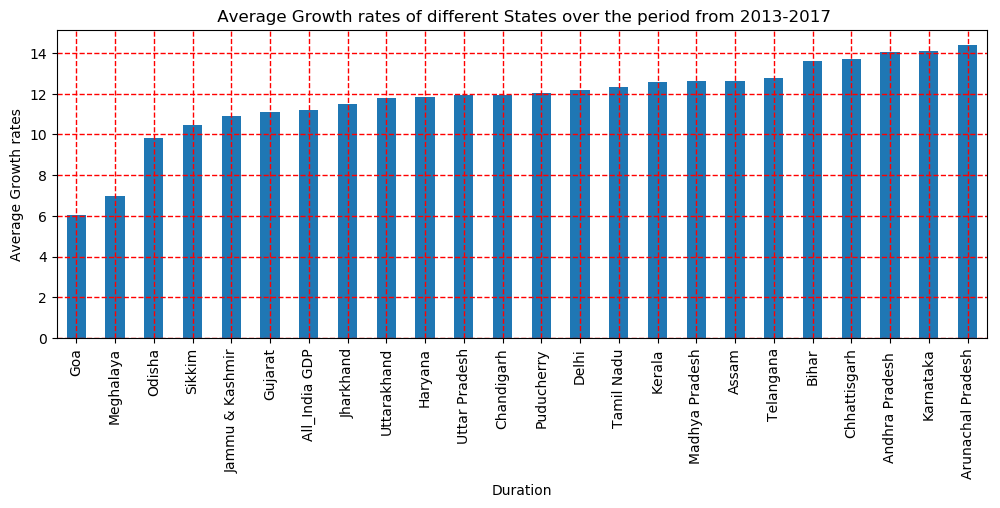

In [31]:
df1.plot.bar(figsize=(12,4))
plt.title(" Average Growth rates of different States over the period from 2013-2017")
plt.xlabel('Duration')
plt.ylabel('Average Growth rates')

plt.grid(True, linewidth= 1, linestyle="--",color ="r")
plt.show()


# which states have been growing consistently fast, and which ones have been struggling?

## From the Graph - Highest

### 1.__Arunachal Pradesh is having highest growth rate over the period of 2013-17__ 
### 2.__Karnataka is the seond highest growth rate.__

## From the Graph - Struggling

### 1.__Goa is struggling__
### 2.__Megalaya__



# Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

-  Tamil Nadu is my home state. When you compare with the home state and the National Average -

In [32]:
df2 = df[['All_India GDP','Tamil Nadu']] # extracting the state and the all India GDP
df2


,All_India GDP,Tamil Nadu
Duration,,
2013-14,12.97,13.51
2014-15,10.65,12.51
2015-16,9.99,10.99


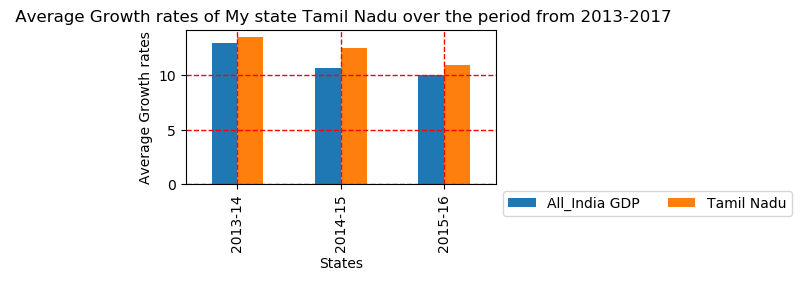

In [33]:
df2.plot.bar(figsize=(4,2)) # Plot the bar graph comparing year wise my state
plt.title(" Average Growth rates of My state Tamil Nadu over the period from 2013-2017")
plt.xlabel('States')
plt.ylabel('Average Growth rates')

plt.legend(bbox_to_anchor=(1, 0), loc='upper left', ncol=2)
plt.grid(True, linewidth= 1, linestyle="--",color ="r")
plt.show()


### From the Above graph we can see Tamil Nadu - My state GDP growth rate is better compared to  All_India GDP growth rate(Total GDP of India)

## Plot the Total GDP of the states for the year 2015-16:

Identify the top 5 and the bottom 5 states based on total GDP.

In [34]:
Total_GDP =df.pivot_table(index = 'Duration', aggfunc = 'mean').sort_values(by=['2015-16'],axis=1,ascending=False) # Used Pivot to take the needed data from the dataframe and sort the highest to the lowest for 2015-16 year
Total_GDP

,Jammu & Kashmir,Andhra Pradesh,Uttarakhand,Assam,Madhya Pradesh,Telangana,Delhi,Arunachal Pradesh,Kerala,Jharkhand,...,Haryana,Goa,Bihar,Uttar Pradesh,Puducherry,All_India GDP,Meghalaya,Sikkim,Chandigarh,Odisha
Duration,,,,,,,,,,,,,,,,,,,,,
2013-14,10.09,12.85,13.64,13.31,14.91,12.63,13.43,16.38,12.79,7.92,...,15.45,-5.77,12.30,14.73,15.87,12.97,4.87,12.35,14.71,12.95
2014-15,4.70,13.40,8.12,11.45,10.11,13.05,10.96,14.79,13.11,15.14,...,9.18,13.12,17.92,10.51,10.14,10.65,6.41,9.72,12.33,10.37
2015-16,17.91,15.85,13.65,13.19,12.86,12.61,12.09,12.07,11.85,11.44,...,10.91,10.75,10.59,10.58,10.15,9.99,9.58,9.39,8.84,6.19


In [35]:
df3=Total_GDP.tail(-2) # The Last row is filtered and stored in df3

df3


,Jammu & Kashmir,Andhra Pradesh,Uttarakhand,Assam,Madhya Pradesh,Telangana,Delhi,Arunachal Pradesh,Kerala,Jharkhand,...,Haryana,Goa,Bihar,Uttar Pradesh,Puducherry,All_India GDP,Meghalaya,Sikkim,Chandigarh,Odisha
Duration,,,,,,,,,,,,,,,,,,,,,
2015-16,17.91,15.85,13.65,13.19,12.86,12.61,12.09,12.07,11.85,11.44,...,10.91,10.75,10.59,10.58,10.15,9.99,9.58,9.39,8.84,6.19


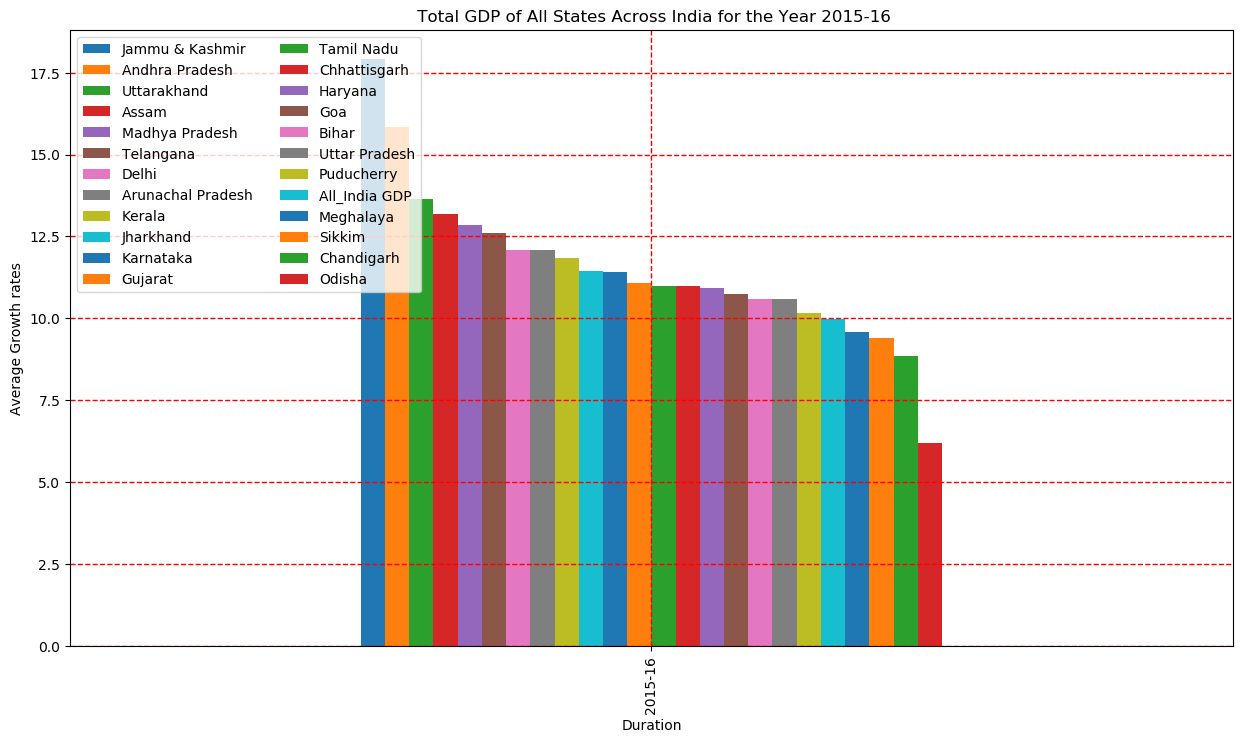

In [36]:
df3.plot.bar(figsize=(15,8))
plt.title(" Total GDP of All States Across India for the Year 2015-16")
plt.xlabel('Duration')
plt.ylabel('Average Growth rates')

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.grid(True, linewidth= 1, linestyle="--",color ="r")
plt.show()

### From the above graph we can see the Top 5 GDP and bottom 5 GDP states having 


In [37]:
df3.iloc[:,0:5] # Top 5 states are given below in the data frame as well

,Jammu & Kashmir,Andhra Pradesh,Uttarakhand,Assam,Madhya Pradesh
Duration,,,,,
2015-16,17.91,15.85,13.65,13.19,12.86


In [38]:
df3.iloc[[0],[18,20,21,22,23]] # Bottom 5 states are given below in the data frame as well.

,Puducherry,Meghalaya,Sikkim,Chandigarh,Odisha
Duration,,,,,
2015-16,10.15,9.58,9.39,8.84,6.19
